<a href="https://colab.research.google.com/github/dfdavila/AI6/blob/master/Plague_Detection_using_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive #permite usar archivos de drive

#This will prompt for authorization
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
import os
os.listdir()

['.config', 'gdrive', 'sample_data']

In [0]:
from fastai.vision import *
from fastai import *

In [0]:
from google.colab.patches import cv2_imshow

**Fetch images from directory**

In [0]:
#path = '/content/gdrive/My Drive/Datasets/PlanVillage/train'
path = '/content/gdrive/My Drive/Datasets/PlantVillage'

In [8]:
carpeta = listdir(path)
for entrada in carpeta:
  print (path+entrada)

/content/gdrive/My Drive/Datasets/PlantVillagetrain
/content/gdrive/My Drive/Datasets/PlantVillage.DS_Store
/content/gdrive/My Drive/Datasets/PlantVillageval
/content/gdrive/My Drive/Datasets/PlantVillagePlantVillagevalidacion


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224,
                                 num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


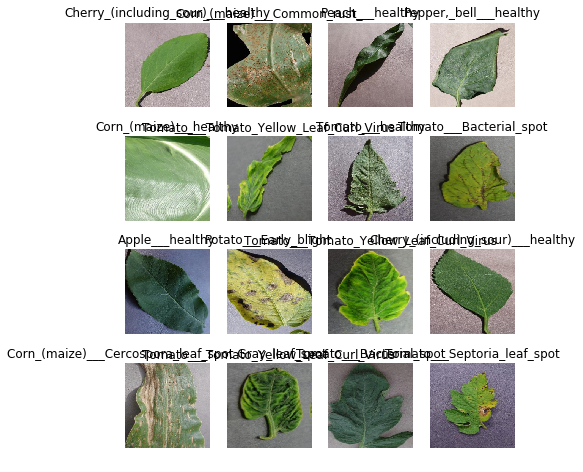

In [10]:
data.show_batch(rows=4, figsize=(7,8))

In [12]:
learn = cnn_learner(data, models.resnet50, metrics= error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 25458615.06it/s]


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.204367,0.105930,0.032982,2:02:02
1,0.101123,0.048917,0.016395,06:45
2,0.051662,0.031258,0.011409,06:40
3,0.039650,0.022842,0.007670,06:37


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


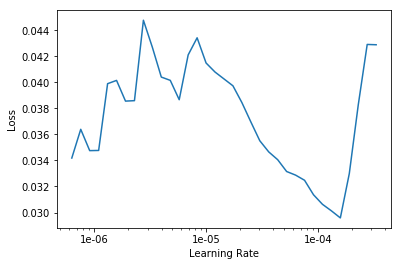

In [17]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.036361,0.017770,0.005657,08:15
1,0.017084,0.011631,0.003739,08:19


In [0]:
learn.save('stage-2')

***Interpretacion***

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


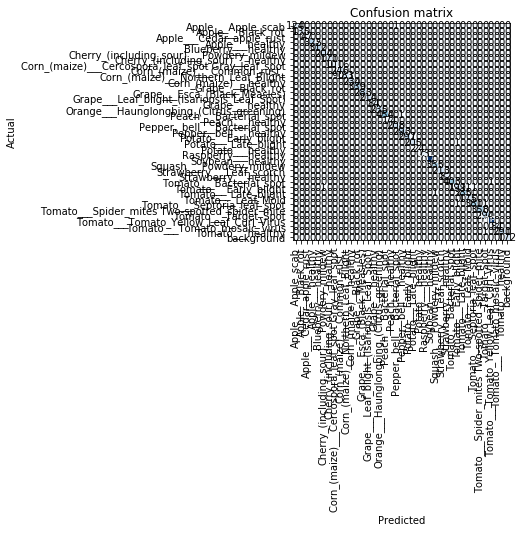

In [23]:
interp.plot_confusion_matrix()

***Guardar modelo***

In [0]:
learn.export()




---
# ***PRODUCCION***

---





**Probar modelo en CPU***

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn = load_learner(path) #en el path se debe tener el archivo con el modelo entrenado export.pkl

In [27]:
pathValidacion = "/content/gdrive/My Drive/Datasets/PlantVillage/val/"
pathValidacion     #las imágenes de prueba deben estar dentro de la carpeta validación

'/content/gdrive/My Drive/Datasets/PlantVillage/val/'

In [0]:
carpetaDatos=[]

for name in os.listdir(pathValidacion):
  if os.path.isdir(os.path.join(path, name)):
    carpetaDatos.append(name)

In [29]:
carpetaDatos    #muestra carpetas dentro de la carpeta validación

[]

In [30]:
#cargar una imagen a predecir
 

i=3   #  i debe tener de 0 a 3 para apuntar a las carpetas con datos
j=7  #  j apunta a una imagen en la carpeta

pathArchivos=(pathValidacion+carpetaDatos[i]+'/')
archivos = listdir(pathArchivos)
imagen = pathArchivos + archivos[j]   


IndexError: ignored

In [31]:
img = open_image(imagen)
print (pathArchivos)
print (archivos[j])
img

NameError: ignored

In [32]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

NameError: ignored